# Creating a Multiple Linear Regression Model for pH (Training data)

In [1]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr

In [2]:
#Reading in dataset
train = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_train.csv")

#Changing column names in train and test datasets 
train.columns = [col.replace(' ', '_') for col in train.columns]

In [4]:
#Check GVIF in R - will remove those that cause multicollinearity issues (Just removed density)

#Got model variables from stepwise selection methods done in R

#Defining the model 
model_mlr = smf.ols(
    "pH ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + sulphates + alcohol + quality + Wine_Type", 
    data = train).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:16:16   Log-Likelihood:                 2920.6
No. Observations:                4547   AIC:                            -5817.
Df Residuals:                    4535   BIC:                            -5740.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7750      0.031    121.927      0.000       3.714       3.836
Wine_Type[T.White]      -0.2389      0.009    -25.520      0.000      -0.257      -0.221
fixed_acidity           -0.0625      0.002    -32.362      0.000      -0.066      -0.059
volatile_acidity        -0.0089      0.017     -0.529      0.597      -0.042       0.024
citric_acid             -0.0601      0.016     -3.659      0.000      -0.092      -0.028
residual_sugar          -0.0048      0.000     -9.754      0.000      -0.006      -0.004
chlorides               -0.6055      0.067     -9.020      0.000      -0.737      -0.474
free_sulfur_dioxide     -0.0002      0.000     -1.230      0.219      -0.001       0.000
total_sulfur_dioxide     0.0004   6.63e-05      5.392      0.000       0.000       0.000
sulphates                0.1058      0.015      6.923      0.000       0.076       0.136
alcohol                  0.0055      0.002      2.632      0.009       0.001       0.010
quality                  0.0016      0.003      0.608      0.543      -0.003       0.007
==============================================================================
Omnibus:                      176.647   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.931
Skew:                           0.368   Prob(JB):                     4.88e-58
Kurtosis:                       3.923   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Want to remove the variables that are insignificant one by one (p-value greater than 0.05)
model_mlr = smf.ols(
    "pH ~ fixed_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol + Wine_Type", 
    data = train).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     350.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:16:16   Log-Likelihood:                 2919.6
No. Observations:                4547   AIC:                            -5821.
Df Residuals:                    4538   BIC:                            -5763.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7711      0.029    130.370      0.000       3.714       3.828
Wine_Type[T.White]      -0.2350      0.008    -28.862      0.000      -0.251      -0.219
fixed_acidity           -0.0623      0.002    -32.481      0.000      -0.066      -0.059
citric_acid             -0.0575      0.015     -3.712      0.000      -0.088      -0.027
residual_sugar          -0.0048      0.000     -9.961      0.000      -0.006      -0.004
chlorides               -0.6133      0.066     -9.238      0.000      -0.743      -0.483
total_sulfur_dioxide     0.0003   5.38e-05      5.710      0.000       0.000       0.000
sulphates                0.1082      0.015      7.174      0.000       0.079       0.138
alcohol                  0.0058      0.002      3.082      0.002       0.002       0.009
==============================================================================
Omnibus:                      177.557   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.215
Skew:                           0.371   Prob(JB):                     4.23e-58
Kurtosis:                       3.919   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

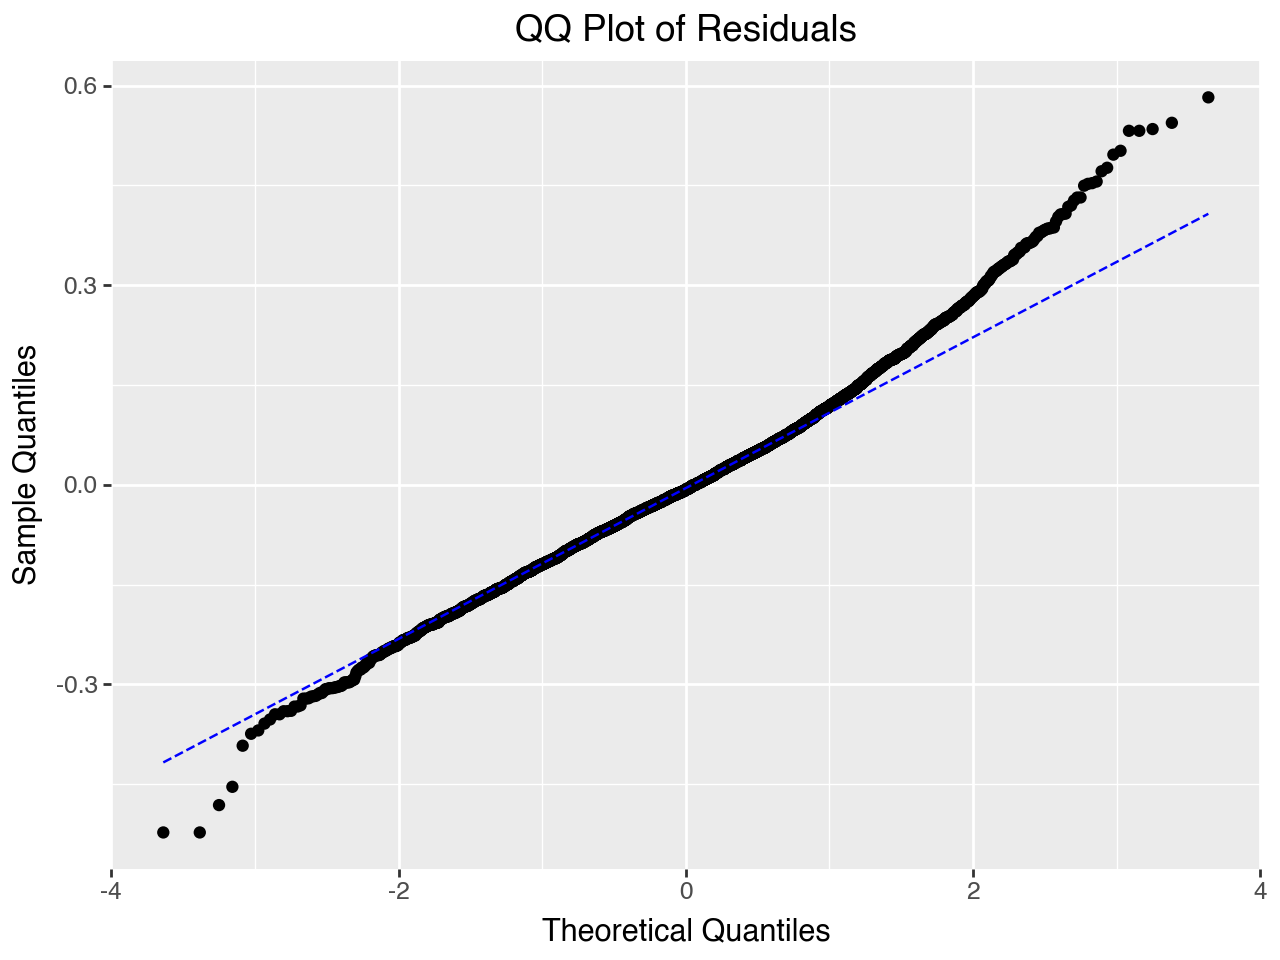

P-value is: 0.000000


In [6]:
#Need to test our assumptions for the model

#First assumption - Check for Normality
#Identifying the model residuals
train['pred_mlr'] = model_mlr.predict()
train['resid_mlr'] = model_mlr.resid

p = (
   ggplot(train, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Looks relatively Normal, but Leptokurtic

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#P-value is zero indicates our residuals are not normal

In [7]:
#We will account for the Non-Normality by doing a log transformation 
#Doing a log transofrmation on pH
train['log_pH'] = np.log(train['pH'])

#Fitting new model with log(pH) as the response variable
model_mlr = smf.ols(
    "log_pH ~ fixed_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol + Wine_Type", 
    data = train).fit()
model_mlr.summary()

#Variables still significant at the 0.05 signficance level
#Also checked multicollinearity in R - still not present

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pH   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     347.2
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:16:17   Log-Likelihood:                 8258.1
No. Observations:                4547   AIC:                        -1.650e+04
Df Residuals:                    4538   BIC:                        -1.644e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3378      0.009    149.628      0.000       1.320       1.355
Wine_Type[T.White]      -0.0726      0.003    -28.869      0.000      -0.078      -0.068
fixed_acidity           -0.0191      0.001    -32.282      0.000      -0.020      -0.018
citric_acid             -0.0171      0.005     -3.567      0.000      -0.026      -0.008
residual_sugar          -0.0015      0.000    -10.139      0.000      -0.002      -0.001
chlorides               -0.1905      0.021     -9.283      0.000      -0.231      -0.150
total_sulfur_dioxide  9.762e-05   1.66e-05      5.875      0.000     6.5e-05       0.000
sulphates                0.0327      0.005      7.014      0.000       0.024       0.042
alcohol                  0.0018      0.001      3.058      0.002       0.001       0.003
==============================================================================
Omnibus:                       97.826   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.131
Skew:                           0.224   Prob(JB):                     6.82e-33
Kurtosis:                       3.763   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

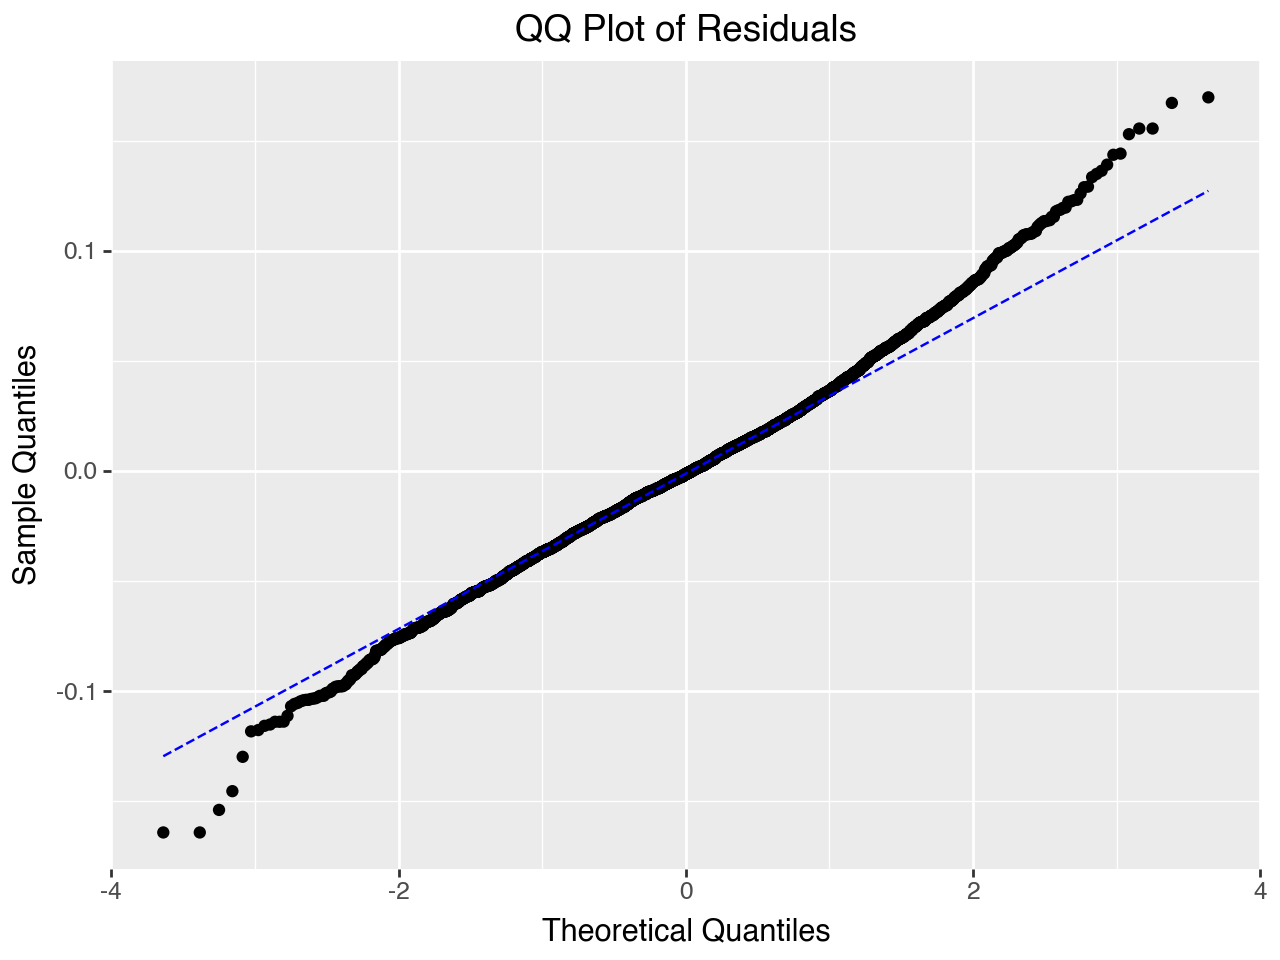

P-value is: 0.000000


In [8]:
#Checking Normality after accounting for Non-Normality with log transformation
train['pred_mlr'] = model_mlr.predict()
train['resid_mlr'] = model_mlr.resid

p = (
   ggplot(train, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#Still Not-Normal - but at least it is accounted for

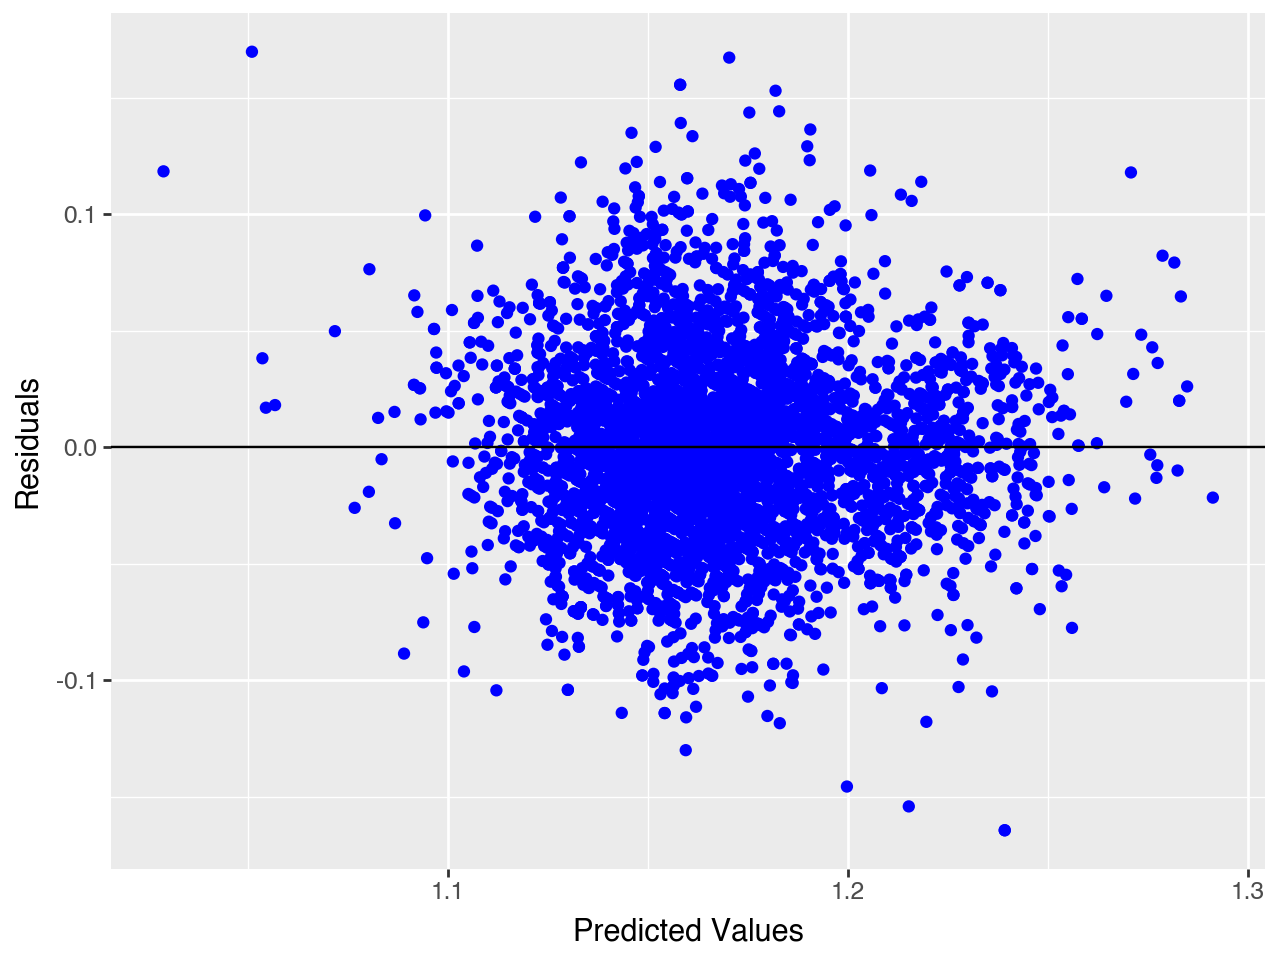

Spearman correlation: -0.049150681162066064
P-value: 0.0009151401756002321


In [9]:
#Second Assumption - Checking for equality of variances 

#Plotting residuals with a scatterplot 
p=(ggplot(train, aes(x="pred_mlr",y="resid_mlr")) +geom_point(color="blue") +
          geom_hline(yintercept = 0) + 
          labs(x="Predicted Values", y="Residuals")
         )

p.show()

#Not necessarily in any pattern and pretty random

#Can also check equal variances with Spearman's Rank Correlation
train['abs_resid']=train['resid_mlr'].abs()
correlation, p_value = spearmanr(train['pred_mlr'], train['abs_resid'])
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

#P-value less than 0.05 indicates there are unequal variances

                            OLS Regression Results                            
Dep. Variable:                 log_pH   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     364.6
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:16:17   Log-Likelihood:                 8258.1
No. Observations:                4547   AIC:                        -1.650e+04
Df Residuals:                    4538   BIC:                        -1.644e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3378 

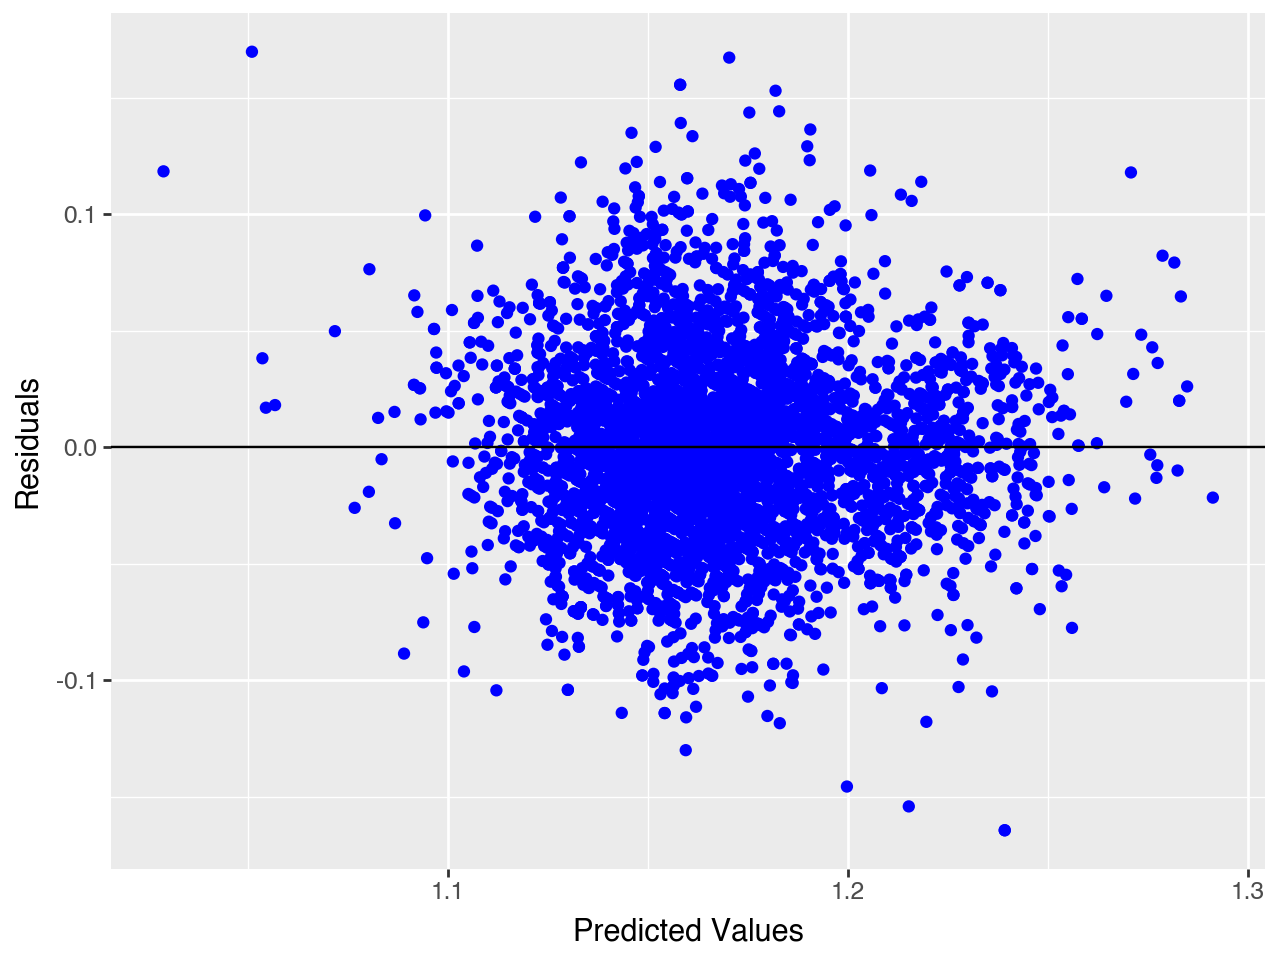

Spearman correlation: -0.049150681162066064
P-value: 0.0009151401756002321


In [10]:
#Already have addressed with log transformation, but can apply robust standard errors as well 

#Applying robust standard errors to address unequal variances
robust_model = smf.ols(
    "log_pH ~ fixed_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol + Wine_Type", 
    data = train).fit(cov_type='HC1')
print(robust_model.summary())

#Plotting residuals after applying robust standard errors
train['pred_mlr'] = robust_model.predict()
train['resid_mlr'] = robust_model.resid

p=(ggplot(train, aes(x="pred_mlr",y="resid_mlr")) +geom_point(color="blue") +
          geom_hline(yintercept = 0) + 
          labs(x="Predicted Values", y="Residuals")
         )

p.show()

#Checking homoscedasticity with a formal test (spearman rank)
train['abs_resid']=train['resid_mlr'].abs()
correlation, p_value = spearmanr(train['pred_mlr'], train['abs_resid'])
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

#Still heteroscedastic variance, but it has now been accounted for by log transoformation and robust standard errors